# Die epsilon Funktion

Wir konstruieren eine neue Menge
$$H=\mathbb{R}\cup \{\epsilon\}$$
und definieren darauf zwei Verknüpfungen $$+, \cdot \text{ mit } \epsilon^2=0, \epsilon\neq 0 $$

Nun wollen wir die Eigenschaften von $(H, +, \cdot) $ herausfinden

In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cbook as cbook
import random as random
# für widgets zum interagieren
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [100]:
class Epsilon:
    def __init__(self,a,b):
        self.re = a
        self.ep = b
    def __add__ (self, other):
        return Epsilon(self.re*other.re,self.ep+other.ep)
    def __mul__ (self, other):
        # distributivgesetz
        return Epsilon(self.re*other.re,self.re*other.ep+self.ep*other.re)
    def __abs__ (self):
        return np.hypot(self.re,self.ep)
    def __pow__ (self, other):
        # e^x = Summe von x^n/n! für n = 0,1,...
        # e^(a+bε) = e^a * e^(bε)
        # e^(b*ε) = (e^ε)^b
        # e^ε  = 1/0! + ε/1! + 0/3! + 0/4! + ...
        #      = 1+ε
        # => x in IR, x^(a+bε) = e^ln(x)*(a+bε) = e^(ln(x)*a) * (1+ε)^(ln(x)*b)
        # (a+bε)^x = e^(ln(a+bε)*x)
        # ln(a+bε) = c+dε <=> e^(c+dε) = a+bε
        #                 <=> e^c * d(1+ε) = a+bε
        #                 <=> e^c*d + e^c*dε = a+bε
        # => ln(a+bε) existier <=> a=b = e^c*d, c,d in IR
        if other == 0:
            return Epsilon(0,0)
        if type(other) is int and other > 0:
            return np.prod([self for i in range(other)])
        raise ValueError('bisher nur für IN_0 Exponenten implementiert')
    def __repr__ (self):
        return str(self.re)+" + "+str(self.ep)+"ε" 

In [3]:
Epsilon(1,1)

1 + 1ε

In [4]:
Epsilon(1,1)+Epsilon(2,3)

2 + 4ε

In [5]:
Epsilon(1,0)*Epsilon(0,0)

0 + 0ε

In [6]:
(Epsilon(1,2).re, Epsilon(1,2).ep)

(1, 2)

### Multiplikativer Effekt

In [55]:
def gitterplot(a, x=-5, y=-5, w=10, h=10):
    # Erstelle ein Gitter (Grid) aus Epsilonzahlen
    xn = np.linspace(x,w,30)
    yn = np.linspace(y,h,10)
    grid = np.array([[Epsilon(x,y) for y in yn] for x in xn]) 
    print("a = " + str(a))
    fig, ax = plt.subplots()
    #ax.scatter(x, y, s, c, marker=verts)
    for p in grid.flatten():
        v = a*p
        ax.scatter(v.re, v.ep, c='#4545d6' if abs(p.re)<1/4 or abs(p.ep)<1/4 else '#383838')
    plt.grid(True)
    plt.show()

@interact(re=0.5, ep=0.5)
def f(re,ep):
    gitterplot(Epsilon(re,ep))

interactive(children=(FloatSlider(value=0.5, description='re', max=1.5, min=-0.5), FloatSlider(value=0.5, desc…

Da der obrige Codeblock ein IPython-Widget beinhaltet, kann es dazu kommen, dass der Graph nicht dargestellt werden kann. Für diesen Fall ist hier noch ein Bild des Graphen, wenn $a=0.5+0.5\epsilon$ gewählt wird:

a = 0.5 + 0.5ε


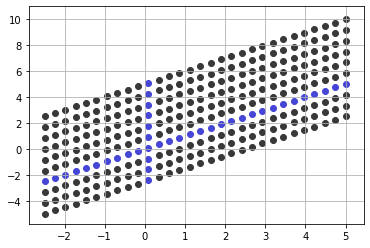

In [162]:
gitterplot(Epsilon(0.5,0.5))

### Potenzwege

Nun wollen wir betrachten, wie eine Folge der folgenden Form aussieht
$$ (a_0,a_1,\dots,a_n), \quad a_{i+1} = b\cdot a_i, \quad a_0,b \in H $$

In [161]:
@interact(n=40, b_re=0.9, b_ep=0.9, a0_re=1, a0_ep=0)
def pathplot(n=40, b_re=0.9, b_ep=0.9, a0_re=1, a0_ep=0):
    b = Epsilon(b_re,b_ep)
    a0= Epsilon(a0_re,a0_ep)
    a = [b**i * a0 for i in range(n)]
    fig, ax = plt.subplots()
    print("a0 = "+str(a0))
    print("b = "+str(b))
    print("n = "+str(n))
    ax.plot([p.re for p in a], [p.ep for p in a])
    plt.grid(True)
    plt.show()

interactive(children=(IntSlider(value=40, description='n', max=120, min=-40), FloatSlider(value=0.9, descripti…

Wie vorher schon, ist der obrige Codeblock ein IPython-Widget und wenn er nicht interactiv in Jupyter Notebook ausgeführt wird, zeigt er keinen Grapher an. Daher ist hier eine Sammlung interessanter Wege:

a0 = 1 + 0ε
b = 0.9 + 0.9ε
n = 100


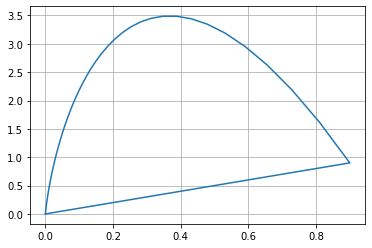

In [163]:
pathplot(100, 0.9,0.9, 1,0)

a0 = 1 + 0ε
b = 1 + 1ε
n = 20


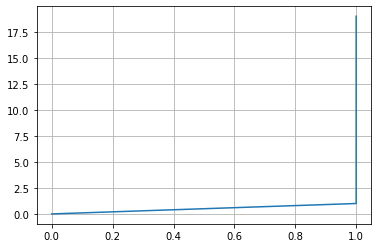

In [164]:
pathplot(20, 1,1, 1,0)

a0 = 1 + 1ε
b = 2 + 1ε
n = 10


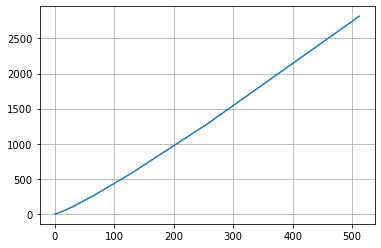

In [173]:
pathplot(10, 2,1, 1,1)